In [1]:
import pandas as pd
import numpy as np #Importing Necessary Libraries

In [2]:
df=pd.read_csv('Mojo_Plus_IMDB_Data.csv')
df.head() #importing dataframe and looking at first 5 rows

,Unnamed: 0,Title,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Distributor,Genres,Rating,...,Unnamed: 0_y,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,The Woman in Black 2: Angel of Death,26501323.0,2602,2602,15027415.0,56.7,Relativity Media,"['Drama', 'Horror', 'Thriller']",PG-13,...,14310.0,"[53, 27, 18]",288158.0,en,The Woman in Black 2: Angel of Death,10.240,2015-01-02,The Woman in Black 2: Angel of Death,5.1,627.0
1,1,The Search for General Tso,54275.0,13,2,9336.0,17.2,IFC Films,"['Comedy', 'Documentary', 'History', 'Mystery']",NaN,...,12399.0,[99],261041.0,en,The Search for General Tso,1.404,2014-04-20,The Search for General Tso,6.7,31.0
2,2,The Taking of Tiger Mountain,228984.0,13,7,50621.0,22.1,Well Go USA Entertainment,"['Action', 'Adventure', 'Biography', 'History'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Li'l Quinquin,7192.0,2,1,3204.0,44.5,Kino Lorber,"['Comedy', 'Crime', 'Mystery']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Trace Amounts,80735.0,7,0,0.0,0.0,GathrFilms,"['Adventure', 'Documentary', 'Drama', 'History']",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns #column list

Index(['Unnamed: 0', 'Title', 'Gross', 'Max_Theaters',
       'Opening_Weekend_Theaters', 'Opening_Weekend_Gross',
       'Opening_Weekend_Percent_of_Gross', 'Distributor', 'Genres', 'Rating',
       'Runtime', 'Date', 'title_lowercase', 'Unnamed: 0_y', 'genre_ids', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True) #dropping non useful column
df.head()

,Title,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Distributor,Genres,Rating,Runtime,...,Unnamed: 0_y,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,The Woman in Black 2: Angel of Death,26501323.0,2602,2602,15027415.0,56.7,Relativity Media,"['Drama', 'Horror', 'Thriller']",PG-13,98,...,14310.0,"[53, 27, 18]",288158.0,en,The Woman in Black 2: Angel of Death,10.240,2015-01-02,The Woman in Black 2: Angel of Death,5.1,627.0
1,The Search for General Tso,54275.0,13,2,9336.0,17.2,IFC Films,"['Comedy', 'Documentary', 'History', 'Mystery']",NaN,71,...,12399.0,[99],261041.0,en,The Search for General Tso,1.404,2014-04-20,The Search for General Tso,6.7,31.0
2,The Taking of Tiger Mountain,228984.0,13,7,50621.0,22.1,Well Go USA Entertainment,"['Action', 'Adventure', 'Biography', 'History'...",NaN,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Li'l Quinquin,7192.0,2,1,3204.0,44.5,Kino Lorber,"['Comedy', 'Crime', 'Mystery']",NaN,206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trace Amounts,80735.0,7,0,0.0,0.0,GathrFilms,"['Adventure', 'Documentary', 'Drama', 'History']",NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## My first goal is to determine which month or months are the best to release a movie.

## To do this, I will be adding a Year and a Month column. Then, I will do a groupby to extract gross sales data by month and year.

In [7]:
df.Date.tail() #checking the formatting of the date column

4534    2020-08-14
4535    2020-08-14
4536    2020-08-14
4537    2020-08-14
4538    2020-08-14
Name: Date, dtype: object

In [25]:
df['Year']=df.Date.apply(lambda x:x[0:4])#extracting year from date and adding to Year
df.Year=pd.to_numeric(df.Year)           #column
df.Year

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
4534    2020
4535    2020
4536    2020
4537    2020
4538    2020
Name: Date, Length: 4539, dtype: int64

In [31]:
df['Month']=df.Date.apply(lambda x:x[5:7])#extracting month from date column and adding to
df.Month=df.Month.astype('int')           #Month column
df.Month

0       1
1       1
2       1
3       1
4       1
       ..
4534    8
4535    8
4536    8
4537    8
4538    8
Name: Date, Length: 4539, dtype: int64

In [33]:
df.columns #confirming columns were added

Index(['Title', 'Gross', 'Max_Theaters', 'Opening_Weekend_Theaters',
       'Opening_Weekend_Gross', 'Opening_Weekend_Percent_of_Gross',
       'Distributor', 'Genres', 'Rating', 'Runtime', 'Date', 'title_lowercase',
       'Unnamed: 0_y', 'genre_ids', 'id', 'original_language',
       'original_title', 'popularity', 'release_date', 'title', 'vote_average',
       'vote_count', 'Year', 'Month'],
      dtype='object')

In [42]:
df.groupby(['Year','Month']).median() #checking statistics after grouping by Year and Month

Gross  Max_Theaters  Opening_Weekend_Theaters  \
Year Month                                                     
2015 01      86098.5          15.5                      11.0   
     02     378329.0          40.5                       5.0   
     03     176391.0          29.0                       4.0   
     04     129784.0          25.0                       6.0   
     05     103536.0          20.0                       2.0   
...              ...           ...                       ...   
2020 04      19920.5           3.0                       3.0   
     05      65713.0          10.5                       2.0   
     06      86419.5          33.0                      28.0   
     07     164000.0          72.0                      68.0   
     08      46746.0          40.5                      40.5   

            Opening_Weekend_Gross  Opening_Weekend_Percent_of_Gross  Runtime  \
Year Month                                                                     
2015 01                   20150.0                             40.70     99.5   
     02                   40503.5                             28.20    101.5   
     03                   24963.5                             28.25     99.0   
     04                   19206.0                             30.70    102.0   
     05                   14471.0                             13.50    100.0   
...                           ...                               ...      ...   
2020 04                    5516.5                             24.45    110.0   
     05                     767.5                              2.50     96.5   
     06                   26125.5                             23.30     96.0   
     07                  140000.0                              0.00    106.0   
     08                   27239.0                            100.00     93.5   

            Unnamed: 0_y        id  popularity  vote_average  vote_count  
Year Month                                                                
2015 01          14252.0  252838.0      6.2060          6.40       126.0  
     02          14270.0  252718.5      8.1250          6.10       396.0  
     03          14342.5  259786.0      5.1045          6.40        64.0  
     04          14414.5  262307.0      5.7320          6.30        83.5  
     05          14408.0  270886.0      5.8870          6.20        77.0  
...                  ...       ...         ...           ...         ...  
2020 04              NaN       NaN         NaN           NaN         NaN  
     05              NaN       NaN         NaN           NaN         NaN  
     06          11147.0  371017.5      0.6000          3.75         1.5  
     07            747.0   39240.0      2.3770          5.50        10.0  
     08          21436.0  480970.0      0.6000         10.00         1.0  

[68 rows x 11 columns]

In [56]:
y_2015=df.groupby(['Year','Month']).median()['Gross']['2015']#Extracting Gross Sales Data 
x_2015=y_2015.index                                          #Month by Month and Year by Year
y_2016=df.groupby(['Year','Month']).median()['Gross']['2016']
x_2016=y_2016.index
y_2017=df.groupby(['Year','Month']).median()['Gross']['2017']
x_2017=y_2017.index
y_2018=df.groupby(['Year','Month']).median()['Gross']['2018']
x_2018=y_2018.index
y_2019=df.groupby(['Year','Month']).median()['Gross']['2019']
x_2019=y_2019.index
y_2020=df.groupby(['Year','Month']).median()['Gross']['2020']
x_2020=y_2020.index

Text(0.5, 1.0, '2020 Median Gross Sales per Month')

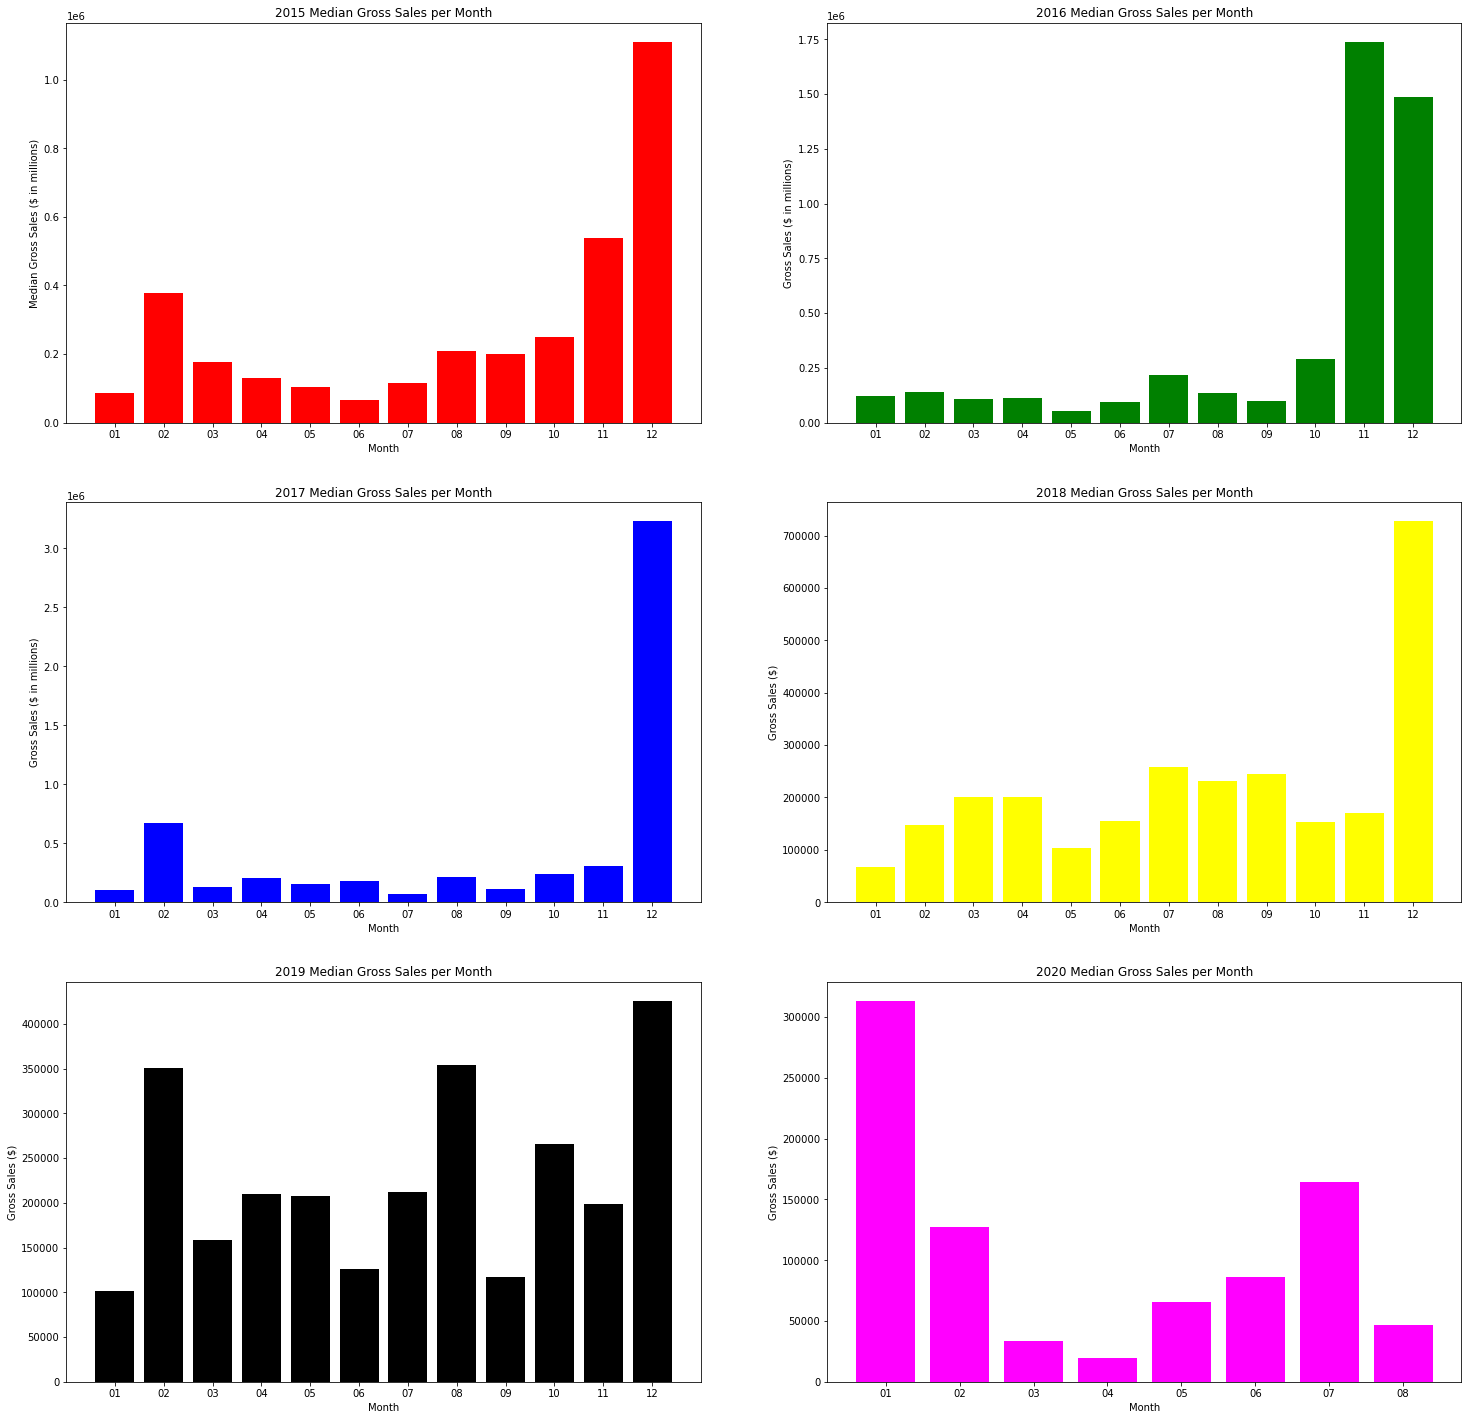

In [74]:
import matplotlib.pyplot as plt #making distinct plot for each year's median sales data
%matplotlib inline              #each plot breaks down the sales data month by month
fig,ax=plt.subplots(3,2, figsize=(25,25))
ax[0][0].bar(x_2015,y_2015,color='red')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Median Gross Sales ($ in millions)')
ax[0][0].set_title('2015 Median Gross Sales per Month')
ax[0][1].bar(x_2016,y_2016,color='green')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Gross Sales ($ in millions)')
ax[0][1].set_title('2016 Median Gross Sales per Month')
ax[1][0].bar(x_2017,y_2017,color='blue')
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Gross Sales ($ in millions)')
ax[1][0].set_title('2017 Median Gross Sales per Month')
ax[1][1].bar(x_2018,y_2018,color='yellow')
ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Gross Sales ($)')
ax[1][1].set_title('2018 Median Gross Sales per Month')
ax[2][0].bar(x_2019,y_2019,color='black')
ax[2][0].set_xlabel('Month')
ax[2][0].set_ylabel('Gross Sales ($)')
ax[2][0].set_title('2019 Median Gross Sales per Month')
ax[2][1].bar(x_2020,y_2020,color='magenta')
ax[2][1].set_xlabel('Month')
ax[2][1].set_ylabel('Gross Sales ($)')
ax[2][1].set_title('2020 Median Gross Sales per Month')

In [82]:
df.groupby(['Year','Month']).median()['Gross'].sort_values(ascending=False).head(20)
#Confirming through sorting which month's are best and comparing with visualizations

Year  Month
2017  12       3226443.0
2016  11       1738477.0
      12       1485167.5
2015  12       1110707.0
2018  12        727119.0
2017  02        671045.5
2015  11        538460.0
2019  12        425332.0
2015  02        378329.0
2019  08        353777.5
      02        351019.0
2020  01        313104.0
2017  11        305206.5
2016  10        292227.5
2019  10        265673.0
2018  07        258507.0
2015  10        249083.0
2018  09        245253.5
2017  10        235786.5
2018  08        231434.0
Name: Gross, dtype: float64

## The graphs and the series above both point to the same conclusion.

## December is by far the best month to release a movie. As it has had the highest median sales in 4 of the last 6 years. Granted due to the holiday season this is  expected. 
## However, It is also apparent through the visualizations and table, that November and Febraury also sell very well.
## That also make sense as both months are near the holiday season as well.
## After those I would rank October and August as the best choices.
## I would presume this is because both months are near or in the summer season.